## Машинное обучение 1, ПМИ ФКН ВШЭ

In [3]:
# %pylab inline
%matplotlib inline
import pandas as pd
import numpy as np

Скачаем данные:

In [4]:
# !wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [5]:
# !powershell iwr -outf somefile https://somesite/somefile

In [6]:
# !pip install wget
# import wget
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> и всего, где можно применить лямбда-функции (`assign`, `map`, ...) крайне нежелательно

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0.5 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите 3 последних строки.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [7]:
data = pd.read_excel('end_seminar.xlsx')
data.tail(3)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


### Ответьте на вопросы:
1. Сколько было уникальных пользователей из групп 18-го года набора, а сколько из групп 17-го года?

In [8]:
n_17 = data.loc[~data['17_group'].isna()]['id'].nunique()
n_18 = data.loc[~data['18_group'].isna()]['id'].nunique()

print(f'Пользователей из групп 18 года: {n_18}')
print(f'Пользователей из групп 17 года: {n_17}')

Пользователей из групп 18 года: 213
Пользователей из групп 17 года: 134


2. Есть ли уникальные студенты с равными перцентилями?

In [9]:
data[data['percentile'].duplicated(keep=False) & ~ data.duplicated(subset=['percentile', 'id'], keep=False)]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
80,2020-05-18 17:09:23.589,3e106aaef8b24dbb01319c73e14c2936,784,182.0,NaN,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.0,NaN,NaN,1.0
231,2020-05-14 21:52:43.844,3a7326c9e355a67d3805824ca34c4bc5,1457,NaN,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Statistical Learning Theory,Символьные вычисления,Численные методы,Символьные вычисления,Да,0.0,173.0,Введение в дифференциальную геометрию,NaN


#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [10]:
data.isna().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок, нулём для числовых и False для булевых (постарайтесь избежать перечисления названий всех столбцов).

In [11]:
data.loc[:, data.dtypes == 'float64'] = data.loc[:, data.dtypes == 'float64'].fillna(0)
data.loc[:, data.dtypes == 'object'] = data.loc[:, data.dtypes == 'object'].fillna('')

In [12]:
data.isna().sum()

timestamp        0
id               0
rating           0
18_group         0
is_mi            0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
percentile       0
17_group         0
blended          0
is_ml_student    0
dtype: int64

#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'.

Каково процентное соотношение ответов? Сколько из них "Нет"?

In [13]:
data['is_first_time'].value_counts(normalize=True)

is_first_time
Да     0.853186
Нет    0.141274
       0.005540
Name: proportion, dtype: float64

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [14]:
data['timestamp2'] = data['timestamp'].astype('int64') // 10 ** 9

In [15]:
data = data.loc[data.groupby('id')['timestamp2'].idxmax()]

#### 4. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [16]:
course_names = data.loc[data['blended'] != '']['blended'].unique().tolist()
course_names

['Соревновательный анализ данных',
 'DevOps',
 'Введение в дифференциальную геометрию']

In [17]:
da = data.loc[data['blended'] == 'Соревновательный анализ данных']
devops = data.loc[data['blended'] == 'DevOps']
diff_geom = data.loc[data['blended'] == 'Введение в дифференциальную геометрию']

In [18]:
tmp1 = np.array([da['id'].nunique(), devops['id'].nunique(), diff_geom['id'].nunique()])
max_course = course_names[np.argmax(tmp1)]
print(f'Больше всего студентов записалось на курс: {max_course}')
print(f'На него записалось {max(tmp1)} студентов')

Больше всего студентов записалось на курс: DevOps
На него записалось 87 студентов


In [19]:
tmp2 = np.array([da['rating'].mean(), devops['rating'].mean(), diff_geom['rating'].mean()])
max_rating_course = course_names[np.argmax(tmp2)]
n_max_rating_course = tmp1[np.argmax(tmp2)]

print(f'На курсе {max_rating_course} собрались студенты с самым высоким средним рейтингом')
print(f'Всего их {n_max_rating_course}')

На курсе Введение в дифференциальную геометрию собрались студенты с самым высоким средним рейтингом
Всего их 15


#### 5. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [20]:
need_columns = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']

In [21]:
data.groupby(need_columns).size().reset_index(name='count').query('count > 1')

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,count
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
60,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,DevOps,2
62,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,DevOps,2
72,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
84,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps,2
102,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
105,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2
113,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
137,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2
155,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,,2


#### 6. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [22]:
need_columns_without_blended = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3']

group_18 = data.loc[data['18_group'] != 0, need_columns_without_blended]
group_17 = data.loc[data['17_group'] != 0, need_columns_without_blended]

common_courses = set(group_18.values.flatten()) & set(group_17.values.flatten())

print(*common_courses, sep='\n')

Численные методы
Сбор и обработка данных с помощью краудсорсинга
Принятие решений в условиях риска и неопределённости
Безопасность компьютерных систем
Высокопроизводительные вычисления
Моделирование временных рядов
Statistical Learning Theory


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [23]:
all_18_courses = set(group_18.values.flatten())
all_17_courses = set(group_17.values.flatten())

print('Курсы только для студентов 18 года:')
print(*all_18_courses - common_courses, sep='\n')
print()
print('Курсы только для студентов 17 года:')
print(*all_17_courses - common_courses, sep='\n')

Курсы только для студентов 18 года:
Компьютерные сети
Дискретная оптимизация
Дополнительные главы прикладной статистики
Матричные вычисления
Анализ данных в бизнесе
Теория баз данных
Промышленное программирование на языке Java
Язык SQL
Машинное обучение 2
Системы баз данных

Курсы только для студентов 17 года:
Анализ неструктурированных данных
Проектирование и разработка высоконагруженных сервисов
Символьные вычисления
Генеративные модели в машинном обучении
Конфликты и кооперация
Глубинное обучение в обработке звука
Байесовские методы машинного обучения
Компьютерное зрение
Методы сжатия и передачи медиаданных
Обучение с подкреплением


### Визуализации и matplotlib

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

#### 7. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [25]:
data['date'] = pd.to_datetime(data['timestamp']).dt.date

In [26]:
tmp3 = data.groupby('date')['rating'].mean().reset_index(name='mean_rating')

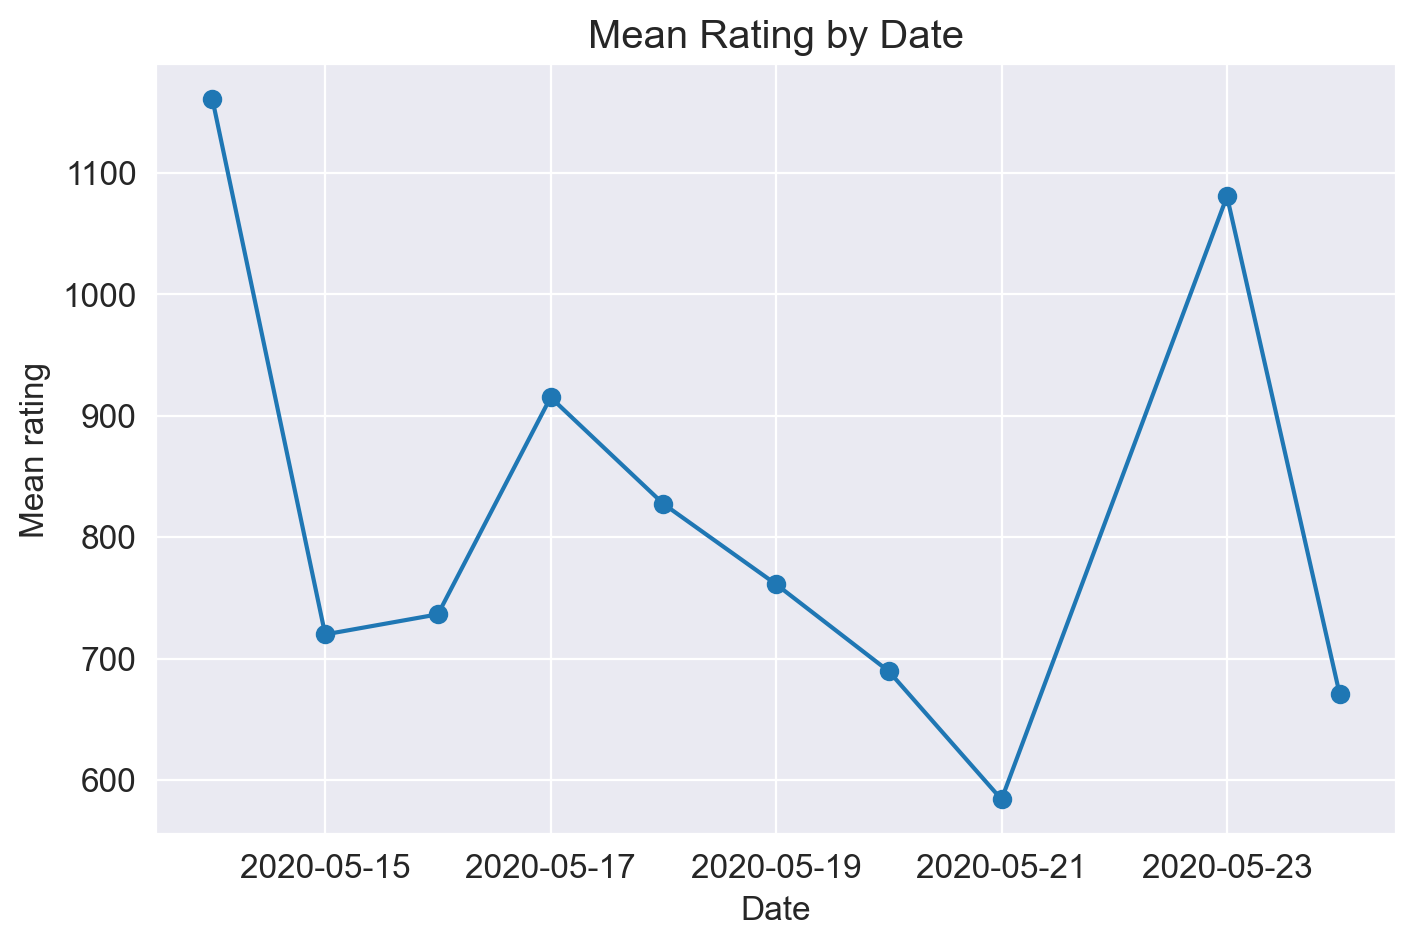

In [27]:
plt.plot(tmp3['date'], tmp3['mean_rating'], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel('Mean rating')

plt.title("Mean Rating by Date")

plt.savefig("plot1.pdf", bbox_inches='tight')

Сохраните график в формате pdf (так он останется векторизованным).

### 2. Распределение студентов по курсам.

## 📌 **Алгоритм распределения студентов по курсам**:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

## ☝️ **Обращаем ваше внимание на следующие детали:**
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь `df.to_csv('solution.csv', index=None)`
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [28]:
assert data.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert data.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [29]:
spec_by_group_17 = {
    'MOP': [171, 172],
    'TI': [173]
}

# По умолчанию каждый студент должен выбрать один осенний курс
data['fall_count'] = 1
# Студенты, которые должны выбрать 2 осенних курса
data.loc[(data['is_mi'] == 1) | (data['17_group'].isin(spec_by_group_17['MOP'] + spec_by_group_17['TI'])), 'fall_count'] = 2

# По умолчанию каждый студент должен выбрать один весенний курс
data['spring_count'] = 1
# Студенты, которые должны выбрать 2 весенних курса
data.loc[data['17_group'].isin(spec_by_group_17['MOP'] + spec_by_group_17['TI']), 'spring_count'] = 2

Проверка:

In [30]:
col_name = 'fall_count'

assert(data[data['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(data[data['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(data[data['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(data[data['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

In [31]:
# Перед распределением поправим приоритеты
# Проверим, есть ли МОП студенты, выбравшие весенним курсом Машинное обучение 2, если есть, сдвинем приоритеты

# МОП студенты 17 и 18 года
MOP_students = data.loc[(data['is_ml_student'] == 1) | (data['17_group'].isin(spec_by_group_17['MOP']))]

# Те из них, кто выбрал весенний курс Машинное обучение 2
MOP_ids = MOP_students.loc[(MOP_students[['spring_1', 'spring_2', 'spring_3']] == 'Машинное обучение 2').any(axis=1)]['id'].tolist()

In [32]:
def shift_priorities(ids, data):
    def shift_for_row(row):
        shifted = [val for val in row if val != 'Машинное обучение 2']
        return shifted + ['---'] * (len(row) - len(shifted))

    mask = data['id'].isin(ids)
    result = data.loc[mask, ['spring_1', 'spring_2', 'spring_3']].apply(shift_for_row, axis=1)
    data.loc[mask, ['spring_1', 'spring_2', 'spring_3']] = result.tolist()

    return data

In [33]:
shift_priorities(MOP_ids, data)
data.loc[data['id'].isin(MOP_ids)]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,timestamp2,date,fall_count,spring_count
27,2020-05-16 13:02:24.706,5daee1bd98559bb2c52373e416942225,593,182.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Моделирование временных рядов,Промышленное программирование на языке Java,Анализ данных в бизнесе,---,Нет,0.681614,0.0,,1.0,1589634144,2020-05-16,1,1
137,2020-05-18 21:24:23.667,6ed89e424179b0510e3f7c0cb7369ad6,558,187.0,0.0,Моделирование временных рядов,Матричные вычисления,Язык SQL,Анализ данных в бизнесе,Промышленное программирование на языке Java,---,Да,0.838565,0.0,,1.0,1589837063,2020-05-18,1,1
179,2020-05-18 23:01:03.214,abceddfa2fc4eae8cff4a4e712abb3fb,664,183.0,0.0,Моделирование временных рядов,Принятие решений в условиях риска и неопределё...,Statistical Learning Theory,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,---,Да,0.345291,0.0,,1.0,1589842863,2020-05-18,1,1
20,2020-05-15 21:55:16.699,f0f6f3881894172a0f04e79b554b49e6,673,181.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Численные методы,Дополнительные главы прикладной статистики,---,Да,0.300448,0.0,,1.0,1589579716,2020-05-15,1,1
119,2020-05-18 20:34:07.220,fc2c60b8004aa91bc272df84628621ff,639,183.0,0.0,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Системы баз данных,Анализ данных в бизнесе,---,Нет,0.461883,0.0,,1.0,1589834047,2020-05-18,1,1


#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [34]:
# Количество мест (отличное от 30) на курсах:
except_rools = {
    'Statistical Learning Theory': 60,
    'Анализ неструктурированных данных': float('inf'),
    'Высокопроизводительные вычисления': 60,
    'Обучение с подкреплением': 60,
    'Анализ данных в бизнесе': 60
}

In [35]:
def get_dict_course_places(all_courses, except_rools: list[tuple[str, float]]):
    dct = {}
    for course in all_courses:
        places = except_rools.get(course, 30)
        dct[course] = places

    return dct

In [36]:
def wave(data, course_dct, columns, n_choices):
    for course_name, places in course_dct.items():
        if places == 0:
            continue
        applicants = data.loc[(data[columns[0]] == course_name) | ((data[n_choices] == 2) & (data[columns[1]] == course_name))].sort_values(by='percentile')
        enrolled_ids = applicants.head(min(applicants.shape[0], places))['id']
        course_dct[course_name] -= len(enrolled_ids)
        data.loc[(data['id'].isin(enrolled_ids)) & (data['course1'] != '???'), 'course2'] = course_name
        data.loc[(data['id'].isin(enrolled_ids)) & (data['course1'] == '???'), 'course1'] = course_name
        
    return data

In [37]:
def distribution_by_course(data, season, except_rools, n_waves):
    assert 1 <= n_waves <= 3
    
    if season == 'fall':
        all_courses = set(data[['fall_1', 'fall_2', 'fall_3']].values.ravel())
        columns = ['fall_1', 'fall_2', 'fall_3', 'id']
        n_choices = 'fall_count'
    
    elif season == 'spring':
        all_courses = set(data[['spring_1', 'spring_2', 'spring_3']].values.ravel())
        all_courses.remove('---')
        
        columns = ['spring_1', 'spring_2', 'spring_3', 'id']
        n_choices = 'spring_count'

    data.loc[:, 'course1'] = '???' 
    data.loc[:, 'course2'] = '???'
    data.loc[data[n_choices] == 1, 'course2'] = '-'

    course_dct = get_dict_course_places(all_courses, except_rools)
    
    for i in range(n_waves):
        available_students_mask = (data['course1'] == '???') | (data['course2'] == '???')
        if i == 2:
            available_students_mask &= (data[n_choices] != 2)
            
        wave_columns = columns[i: i+2]
        data.loc[available_students_mask] = wave(data.loc[available_students_mask], course_dct, wave_columns, n_choices)
        
    return data

In [38]:
data2 = data.copy()

In [39]:
data2 = distribution_by_course(data2, 'fall', except_rools, n_waves=1)
data2.head(5)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,percentile,17_group,blended,is_ml_student,timestamp2,date,fall_count,spring_count,course1,course2
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,...,0.896861,0.0,,0.0,1589839691,2020-05-18,1,1,???,-
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,...,0.892377,0.0,,0.0,1589820463,2020-05-18,1,1,???,-
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,...,0.847826,173.0,Соревновательный анализ данных,0.0,1589842899,2020-05-18,2,2,Анализ неструктурированных данных,???
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,...,0.139013,0.0,,1.0,1589824560,2020-05-18,1,1,Безопасность компьютерных систем,-
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,...,0.121076,0.0,,0.0,1589821234,2020-05-18,1,1,Безопасность компьютерных систем,-


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [40]:
def get_percentile_by_course(data, how):
    course1 = data.groupby(by='course1').agg({'percentile': how}).reset_index()
    course1 = course1.rename(columns={'course1': 'course_name', 'percentile': f'{how}_percentile1'})
    
    course2 = data.groupby(by='course2').agg({'percentile': how}).reset_index()
    course2 = course2.rename(columns={'course2': 'course_name', 'percentile': f'{how}_percentile2'})

    course = course1.merge(course2, on='course_name', how='outer')
    course['percentile'] = getattr(course[[f'{how}_percentile1', f'{how}_percentile2']], how)(axis=1)

    course = course.loc[~course['course_name'].isin(['???', '-'])]
    
    return course[['course_name', 'percentile']]

In [41]:
course_best = get_percentile_by_course(data2, 'min')
data2.loc[:, 'is_first'] = False

for course_name, best_percentile in zip(course_best['course_name'].tolist(), course_best['percentile'].tolist()):
    data2.loc[((data2['course1'] == course_name) | (data2['course2'] == course_name)) & (data2['percentile'] == best_percentile), 'is_first'] = True

In [42]:
course_last = get_percentile_by_course(data2, 'max')
data2.loc[:, 'is_last'] = False

for course_name, last_percentile in zip(course_last['course_name'].tolist(), course_last['percentile'].tolist()):
    data2.loc[((data2['course1'] == course_name) | (data2['course2'] == course_name)) & (data2['percentile'] == last_percentile), 'is_last'] = True

In [43]:
# !wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'

In [44]:
check_df = pd.read_csv('2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [45]:
fir_col_name = 'is_first'     # insert name of your new column with is_first_place as str
last_col_name = 'is_last'   # insert name of your new column with is_last_place as str


assert((data2[data2[fir_col_name] == True][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((data2[data2[last_col_name] == True][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

#### 3. [2 балла] Проведите все три волны отбора студентов на курсы по выбору

In [46]:
data3 = data.copy()

res_fall = distribution_by_course(data3, 'fall', except_rools, n_waves=3)
res_fall.head(5)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,percentile,17_group,blended,is_ml_student,timestamp2,date,fall_count,spring_count,course1,course2
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,...,0.896861,0.0,,0.0,1589839691,2020-05-18,1,1,Матричные вычисления,-
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,...,0.892377,0.0,,0.0,1589820463,2020-05-18,1,1,Statistical Learning Theory,-
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,...,0.847826,173.0,Соревновательный анализ данных,0.0,1589842899,2020-05-18,2,2,Анализ неструктурированных данных,???
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,...,0.139013,0.0,,1.0,1589824560,2020-05-18,1,1,Безопасность компьютерных систем,-
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,...,0.121076,0.0,,0.0,1589821234,2020-05-18,1,1,Безопасность компьютерных систем,-


In [47]:
res_fall.to_csv('res_fall.csv')

### 4. [1 балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.

Если ваш код был хорошо структурирован, то это не составит проблем.

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [48]:
data4 = data.copy()

res_spring = distribution_by_course(data3, 'spring', except_rools, n_waves=3)
res_spring.head(5)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,percentile,17_group,blended,is_ml_student,timestamp2,date,fall_count,spring_count,course1,course2
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,...,0.896861,0.0,,0.0,1589839691,2020-05-18,1,1,Анализ данных в бизнесе,-
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,...,0.892377,0.0,,0.0,1589820463,2020-05-18,1,1,Системы баз данных,-
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,...,0.847826,173.0,Соревновательный анализ данных,0.0,1589842899,2020-05-18,2,2,Компьютерное зрение,Обучение с подкреплением
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,...,0.139013,0.0,,1.0,1589824560,2020-05-18,1,1,Дискретная оптимизация,-
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,...,0.121076,0.0,,0.0,1589821234,2020-05-18,1,1,Дискретная оптимизация,-


In [49]:
res_spring.to_csv('res_spring.csv')

**Отправьте свой файл res_spring.csv в контест (будет в ближайшее время, следите за новостями) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask